# ЛАБОРАТОРНАЯ РАБОТА №6. «ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ. ЗАДАЧА КЛАСТЕРИЗАЦИИ»

In [1]:
from sklearn.datasets import make_blobs, make_classification
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM
from scipy.cluster import hierarchy
from category_encoders.binary import BinaryEncoder
import pandas as pd

# Задание №1

## Генерация датасетов

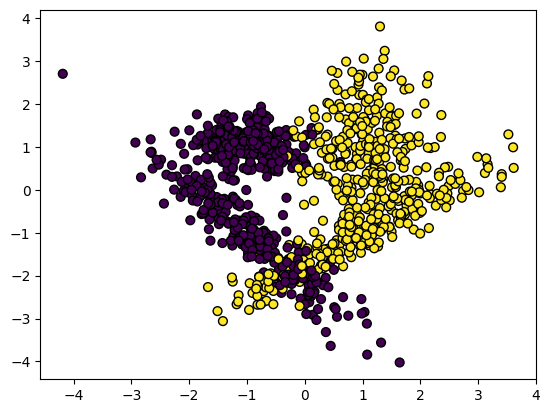

In [150]:
df_2, df_y_2 = make_classification(n_samples=1002, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=10)

plt.scatter(df_2[:, 0], df_2[:, 1], c=df_y_2, s=40, edgecolor="k")
plt.show()

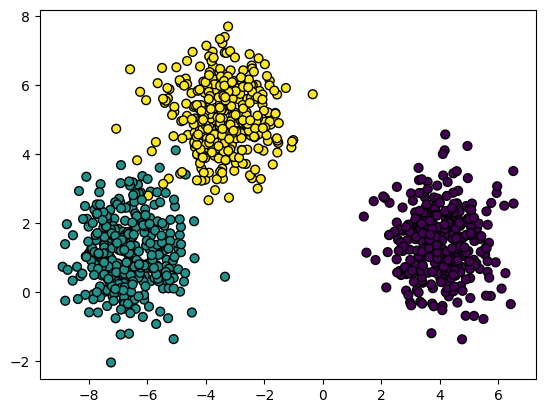

In [3]:
df_3, df_y_3 = make_blobs(n_samples=1000, centers=3)

plt.scatter(df_3[:, 0], df_3[:, 1], c=df_y_3, s=40, edgecolor="k")
plt.show()

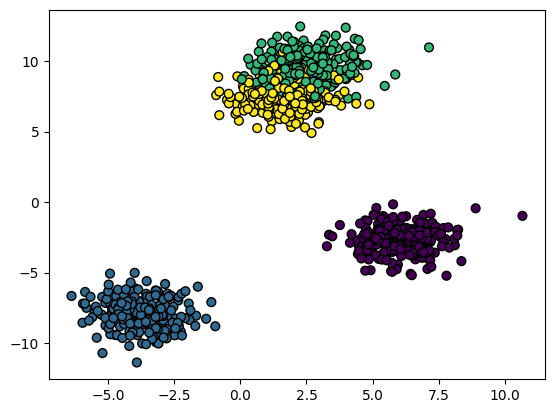

In [4]:
df_4, df_y_4 = make_blobs(n_samples=1000, centers=4)

plt.scatter(df_4[:, 0], df_4[:, 1], c=df_y_4, s=40, edgecolor="k")
plt.show()

## Алгоритмы класстеризации


### K-means

Датасет с двумя классами

Подберу гиперпараметр количество кластеров методом локтя

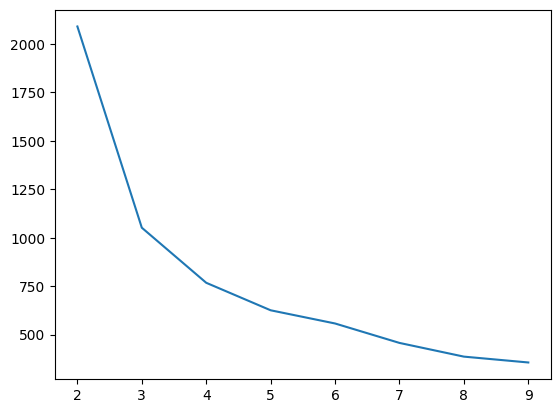

In [5]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(df_2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

Неоднозначно, так что подберу и методом силуэта

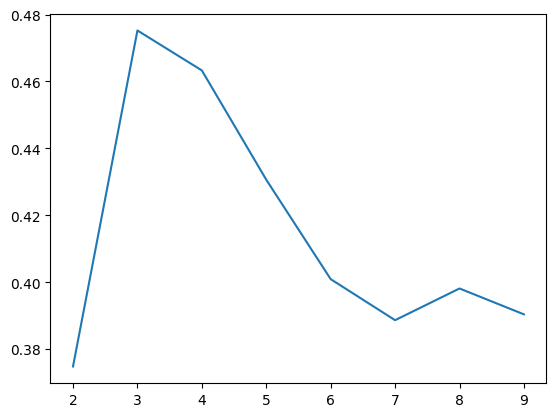

In [6]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(df_2, KMeans(i, n_init='auto').fit(df_2).labels_))

plt.plot(range(2,10), ss)

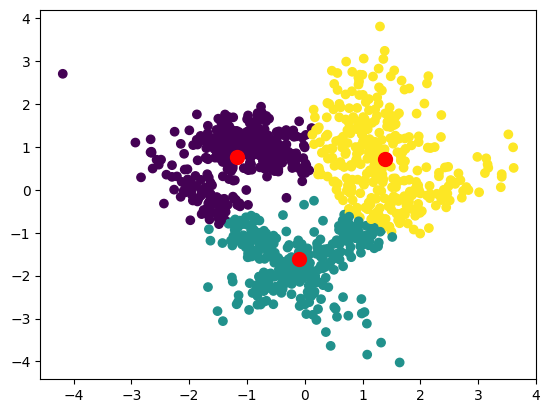

In [7]:
# максимальное значение на графике 3
kmeans2 = KMeans(3, n_init='auto').fit(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [8]:
# внешние метрики
print("ранд:", rand_score(df_y_2, kmeans2.labels_))
# показатель сходства между двумя наборами данных индекс жаккара
print("индекс жаккара:", jaccard_score(kmeans2.labels_, df_y_2, average = None))
# внутренние
print("силуэт:", silhouette_score(df_2, kmeans2.labels_))
print("индекс Дэвиса-Болдина:", davies_bouldin_score(df_2, kmeans2.labels_))

ранд: 0.7128141319758087
индекс жаккара: [0.6536965  0.23343373 0.        ]
силуэт: 0.47523424883582255
индекс Дэвиса-Булдина: 0.718809455383781


Датасет с 3 классами

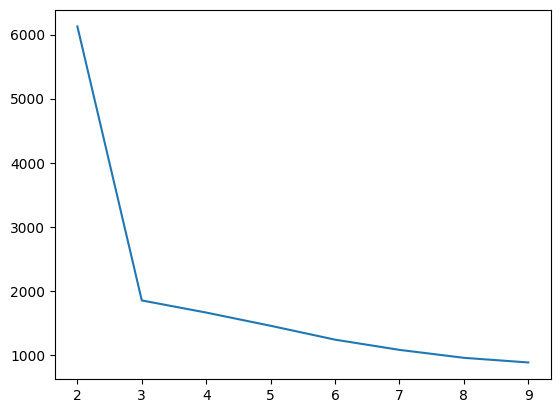

In [9]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(df_3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

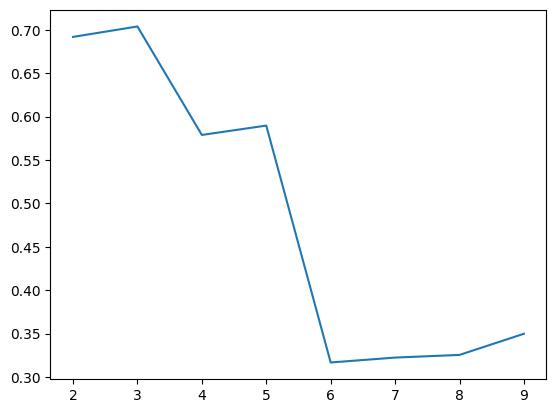

In [10]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(df_3, KMeans(i, n_init='auto').fit(df_3).labels_))

plt.plot(range(2,10), ss)

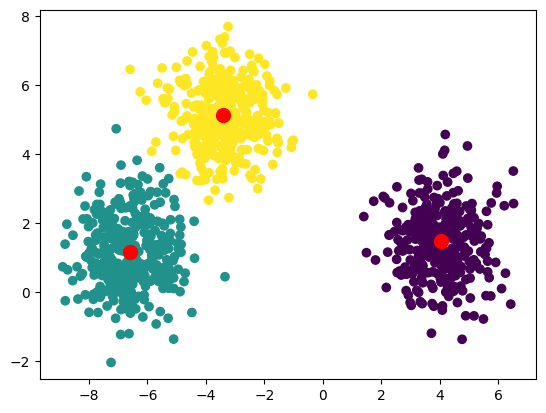

In [40]:
# максимальное значение на графике 3 и в методе локтя чёткая точка перегиба 3
kmeans3 = KMeans(3, n_init='auto').fit(df_3)

plt.scatter(df_3[:,0], df_3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [12]:
print("ранд:", rand_score(df_y_3, kmeans3.labels_))
print("индекс жаккара:", jaccard_score(kmeans3.labels_, df_y_3, average = None))
print("силуэт:", silhouette_score(df_3, kmeans3.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_3, kmeans3.labels_))

ранд: 0.778
индекс жаккара: [0. 0. 0.]
силуэт: 0.69189619902428
индекс Дэвиса-Булдина: 0.42353702139100124


Датасет с 4 классами

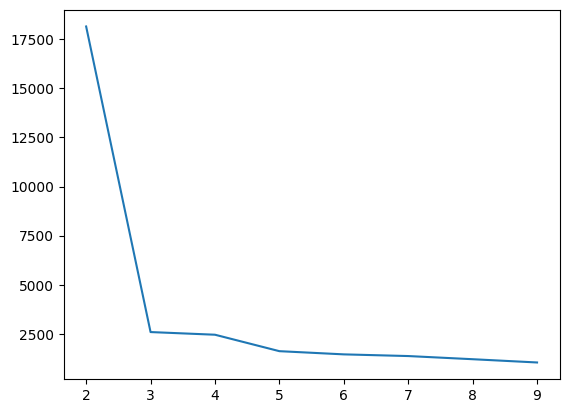

In [13]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(df_4)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

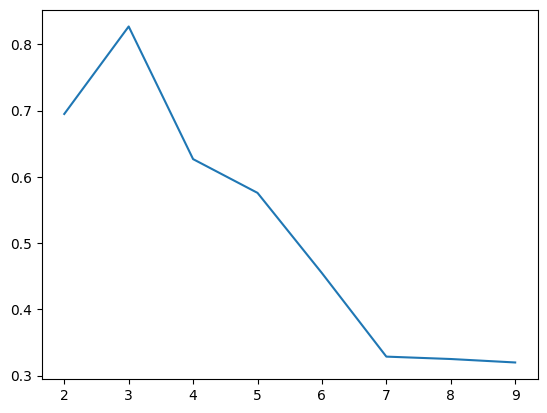

In [14]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(df_4, KMeans(i, n_init='auto').fit(df_4).labels_))

plt.plot(range(2,10), ss)

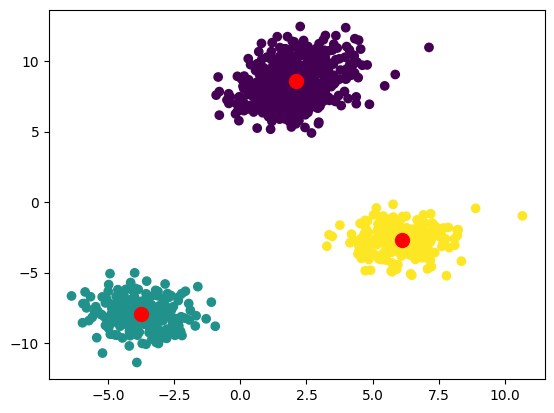

In [15]:
kmeans4 = KMeans(3, n_init='auto').fit(df_4)

plt.scatter(df_4[:,0], df_4[:,1], c=kmeans4.labels_)
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], s=100, c='red')

In [16]:
print("ранд:", rand_score(df_y_4, kmeans4.labels_))
print("индекс жаккара:", jaccard_score(kmeans4.labels_, df_y_4, average = None))
print("силуэт:", silhouette_score(df_4, kmeans4.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_4, kmeans4.labels_))

ранд: 0.8748748748748749
индекс жаккара: [0. 1. 0. 0.]
силуэт: 0.8271172565002517
индекс Дэвиса-Булдина: 0.2271243967111474


### AffinityPropagation

Датасет 1

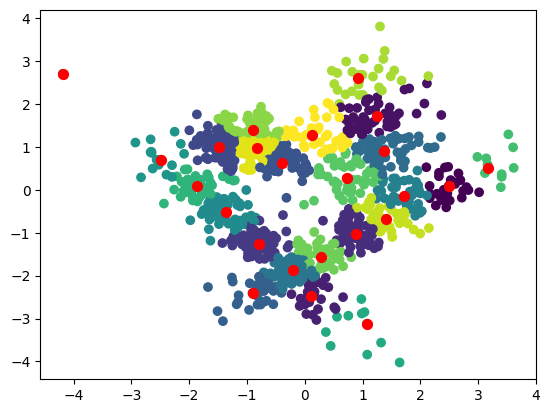

In [17]:
clustering2 = AffinityPropagation(damping=0.9).fit(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=50, c='red')

In [18]:
print("ранд:", rand_score(df_y_2, clustering2.labels_))
print("индекс жаккара:", jaccard_score(clustering2.labels_, df_y_2, average = None))
print("силуэт:", silhouette_score(df_2, clustering2.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_2, clustering2.labels_))

ранд: 0.5422740931722968
индекс жаккара: [0.         0.10179641 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
силуэт: 0.3500744903134389
индекс Дэвиса-Булдина: 0.8076995609046872


Датасет 2

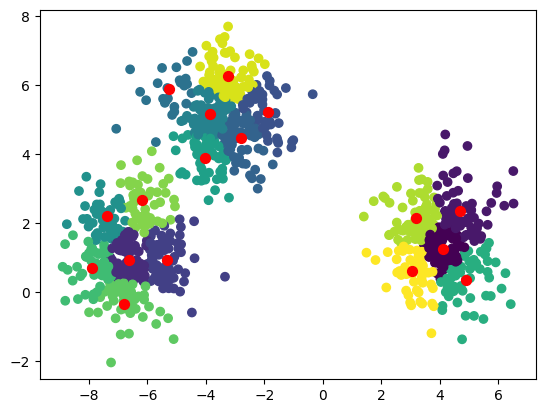

In [19]:
clustering3 = AffinityPropagation(damping=0.7).fit(df_3)

plt.scatter(df_3[:,0], df_3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=50, c='red')

In [20]:
print("ранд:", rand_score(df_y_3, clustering3.labels_))
print("индекс жаккара:", jaccard_score(clustering3.labels_, df_y_3, average = None))
print("силуэт:", silhouette_score(df_3, clustering3.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_3, clustering3.labels_))

ранд: 0.7276136136136137
индекс жаккара: [0.21856287 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
силуэт: 0.31804470439086424
индекс Дэвиса-Булдина: 0.901418537247259


Датасет 3

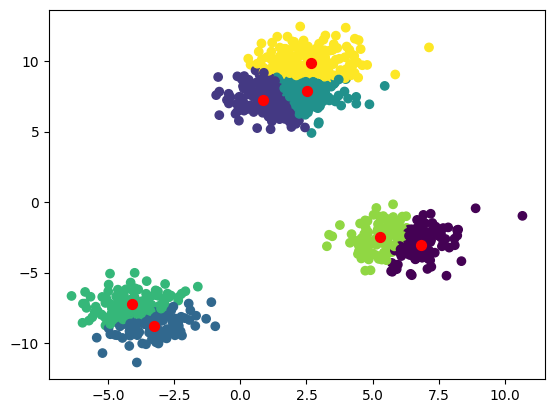

In [41]:
clustering4 = AffinityPropagation(damping=0.9).fit(df_4)

plt.scatter(df_4[:,0], df_4[:,1], c=clustering4.labels_)
plt.scatter(clustering4.cluster_centers_[:,0], clustering4.cluster_centers_[:,1], s=50, c='red')

In [42]:
print("ранд:", rand_score(df_y_4, clustering4.labels_))
print("индекс жаккара:", jaccard_score(clustering4.labels_, df_y_4, average = None))
print("силуэт:", silhouette_score(df_4, clustering4.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_4, clustering4.labels_))

ранд: 0.8564924924924925
индекс жаккара: [0.516      0.         0.         0.37201365 0.         0.
 0.        ]
силуэт: 0.3207070401027897
индекс Дэвиса-Булдина: 1.1408885548666594


### DB-SCAN

Датасет 1

In [23]:
nbrs = NearestNeighbors(n_neighbors=4).fit(df_2)
distances, indices = nbrs.kneighbors(df_2)
distances

array([[0.        , 0.0547601 , 0.08742623, 0.1188403 ],
       [0.        , 0.05493081, 0.05724685, 0.08247593],
       [0.        , 0.05809496, 0.21105199, 0.23465638],
       ...,
       [0.        , 0.11164766, 0.16912292, 0.20104631],
       [0.        , 0.05467467, 0.08924702, 0.11781439],
       [0.        , 0.02418269, 0.04113633, 0.06989789]])

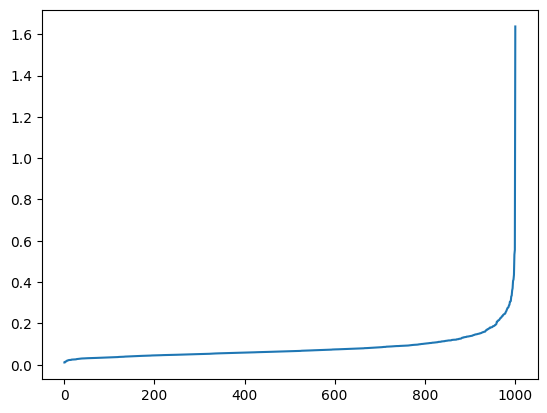

In [25]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [155]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.2, min_samples=i).fit(df_2)
    if silhouette_score(df_2, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_2, dbscan.labels_)
print(best_i)

6


[-1  0  1  2  3  4  5  6]


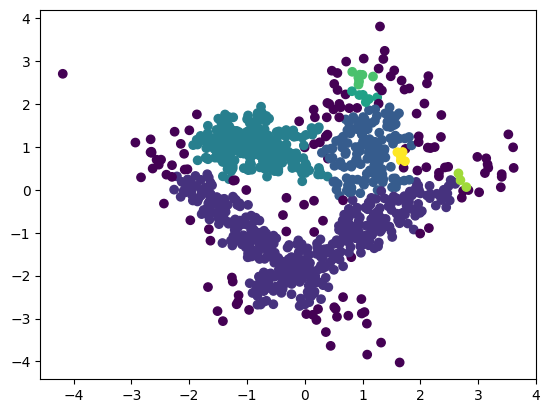

In [156]:
dbscan = DBSCAN(eps=0.2, min_samples=6).fit(df_2)
print(np.unique(dbscan.labels_))
plt.scatter(df_2[:,0], df_2[:,1], c=dbscan.labels_)

In [157]:
print("ранд:", rand_score(df_y_2, dbscan.labels_))
print("индекс жаккара:", jaccard_score(dbscan.labels_, df_y_2, average = None))
print("силуэт:", silhouette_score(df_2, dbscan.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_2, dbscan.labels_))

ранд: 0.569480419779821
индекс жаккара: [0.         0.28337875 0.2749004  0.         0.         0.
 0.         0.        ]
силуэт: 0.1202469393479826
индекс Дэвиса-Булдина: 2.1066154005547184


Датасет 2

In [29]:
nbrs = NearestNeighbors(n_neighbors=4).fit(df_3)
distances, indices = nbrs.kneighbors(df_3)

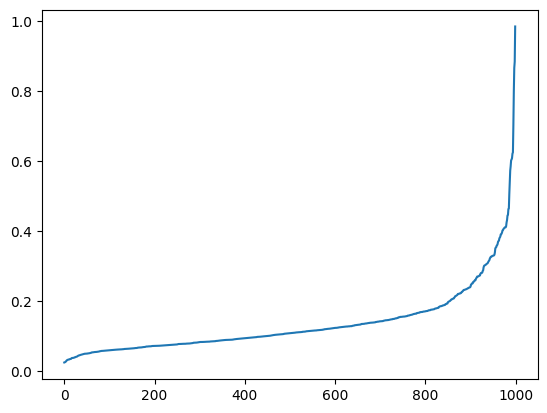

In [30]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [31]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.35, min_samples=i).fit(df_3)
    if silhouette_score(df_3, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_3, dbscan.labels_)
print(best_i)

8


[-1  0  1  2]


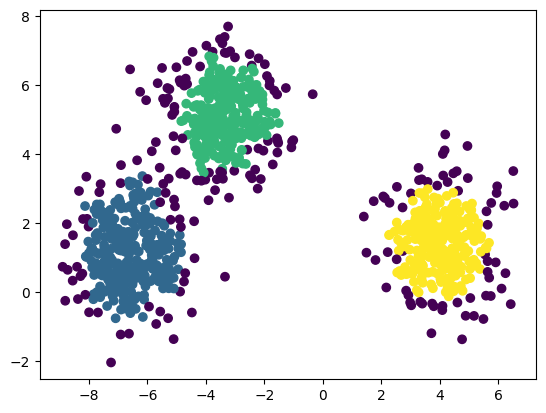

In [43]:
dbscan = DBSCAN(eps=0.35, min_samples=best_i).fit(df_3)
print(np.unique(dbscan.labels_))
plt.scatter(df_3[:,0], df_3[:,1], c=dbscan.labels_)

In [33]:
print("ранд:", rand_score(df_y_3, dbscan.labels_))
print("индекс жаккара:", jaccard_score(dbscan.labels_, df_y_3, average = None))
print("силуэт:", silhouette_score(df_3, dbscan.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_3, dbscan.labels_))

ранд: 0.8549109109109109
индекс жаккара: [0.         0.         0.         0.00165289]
силуэт: 0.45367756407736626
индекс Дэвиса-Булдина: 1.6386720661395056


Датасет 3

In [34]:
nbrs = NearestNeighbors(n_neighbors=13).fit(df_4)
distances, indices = nbrs.kneighbors(df_4)

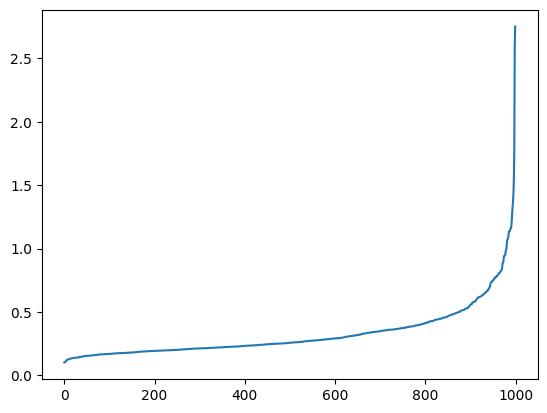

In [35]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [90]:
best_i=0
max_rand=0
for i in range(1,30):
    dbscan = DBSCAN(eps=0.6, min_samples=i).fit(df_4)
    if silhouette_score(df_4, dbscan.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_4, dbscan.labels_)
print(best_i)

3


[-1  0  1  2]


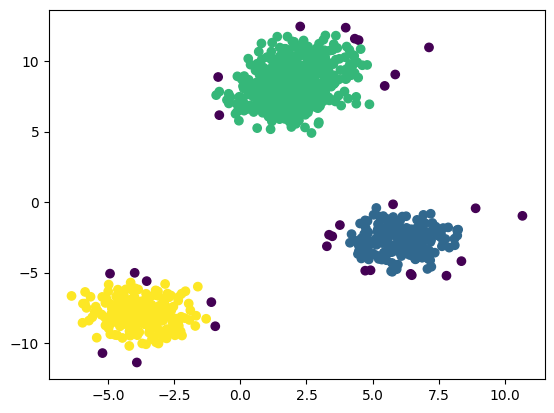

In [91]:
dbscan = DBSCAN(eps=0.6, min_samples=best_i).fit(df_4)
print(np.unique(dbscan.labels_))
plt.scatter(df_4[:,0], df_4[:,1], c=dbscan.labels_)

In [92]:
print("ранд:", rand_score(df_y_4, dbscan.labels_))
print("индекс жаккара:", jaccard_score(dbscan.labels_, df_y_4, average = None))

print("силуэт:", silhouette_score(df_4, dbscan.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_4, dbscan.labels_))

ранд: 0.8648088088088088
индекс жаккара: [0.    0.948 0.    0.    0.   ]
силуэт: 0.7726562467935344
индекс Дэвиса-Булдина: 1.599811959507192


### Gaussian Mixtures

датасет 1

In [52]:
'''param_grid = {
    "n_components": range(1,7),
    "n_init": range(1,15),
    'covariance_type': ["full",'tied', 'diag', 'spherical']
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(df_2)
gridseach.best_params_

>>> {'covariance_type': 'full', 'n_components': 4, 'n_init': 11}
'''

{'covariance_type': 'full', 'n_components': 4, 'n_init': 11}

ранд: 0.6958849533699834
индекс жаккара: [0.4351145  0.46534653 0.         0.        ] 

F-мера 0.4620758483033932
силуэт: 0.3157693913171905
индекс дэвида- болдуина: 1.0248645520289605


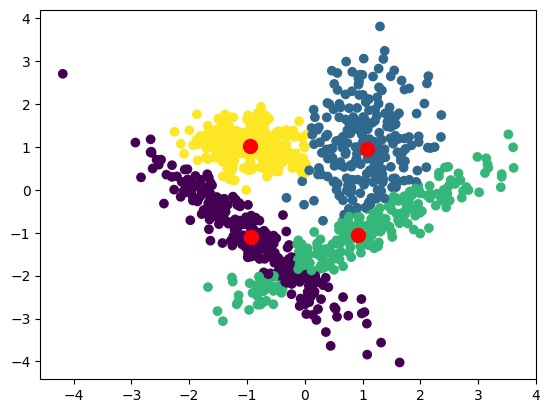

In [74]:
gm = GaussianMixture(n_components=4, n_init=11, covariance_type="full").fit(df_2)

pred=gm.predict(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c=gm.predict(df_2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("ранд:", rand_score(pred, df_y_2))
print("индекс жаккара:", jaccard_score(pred, df_y_2, average= None),'\n')
print("F-мера", f1_score(df_y_2, pred, average="micro"))

print("силуэт:", silhouette_score(df_2, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_2, pred))

Датасет 2

In [56]:
'''param_grid = {
    "n_components": range(1,7),
    "n_init": range(1,15),
    'covariance_type': ["full",'tied', 'diag', 'spherical']
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(df_3)
gridseach.best_params_

>>> {'covariance_type': 'tied', 'n_components': 3, 'n_init': 8}
'''

{'covariance_type': 'tied', 'n_components': 3, 'n_init': 8}

ранд: 0.778
индекс жаккара: [1.  0.  0.5] 

F-мера 0.667
силуэт: 0.69189619902428
индекс дэвида- болдуина: 0.42353702139100124


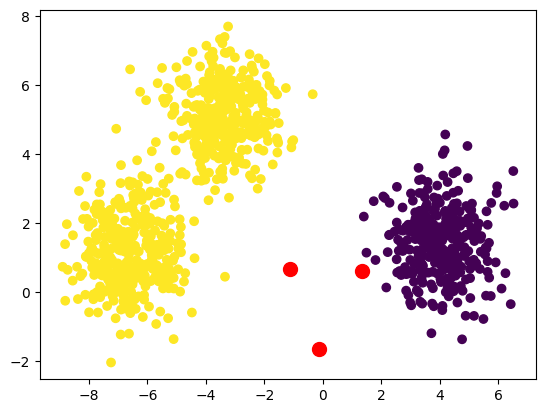

In [76]:
gm = GaussianMixture(n_components=3, n_init=8, covariance_type="tied").fit(df_2)

pred=gm.predict(df_3)

plt.scatter(df_3[:,0], df_3[:,1], c=gm.predict(df_3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("ранд:", rand_score(pred, df_y_3))
print("индекс жаккара:", jaccard_score(pred, df_y_3, average= None),'\n')
print("F-мера", f1_score(df_y_3, pred, average="micro"))

print("силуэт:", silhouette_score(df_3, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_3, pred))

Датасет 3

In [58]:
'''param_grid = {
    "n_components": range(1,7),
    "n_init": range(1,15),
    'covariance_type': ["full",'tied', 'diag', 'spherical']
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(df_4)
gridseach.best_params_

>>> {'covariance_type': 'tied', 'n_components': 4, 'n_init': 2}
'''

{'covariance_type': 'tied', 'n_components': 4, 'n_init': 2}

ранд: 0.8748748748748749
F-мера 0.5
индекс жаккара: [0.  1.  0.  0.5] 

силуэт: 0.8271172565002517
индекс дэвида- болдуина: 0.2271243967111474


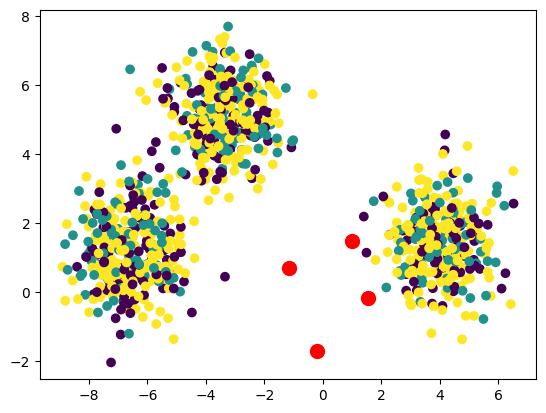

In [65]:
gm = GaussianMixture(n_components=4, n_init=2, covariance_type="tied").fit(df_2)

pred=gm.predict(df_4)

plt.scatter(df_3[:,0], df_3[:,1], c=gm.predict(df_4))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c="red")

print("ранд:", rand_score(pred, df_y_4))
print("F-мера", f1_score(df_y_4, pred, average="micro"))
print("индекс жаккара:", jaccard_score(pred, df_y_4, average= None),'\n')
print("силуэт:", silhouette_score(df_4, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_4, pred))

### Иерархическая кластеризация

Датасет 1

In [93]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(df_2)
    if silhouette_score(df_2, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_2, alg.labels_)
print(best_i)

3


ранд: 0.7501261213836065
индекс жаккара: [0.00225225 0.02979738 0.        ] 

F-мера 0.02694610778443114
силуэт: 0.45704681076289133
индекс дэвида- болдуина: 0.756808749124887


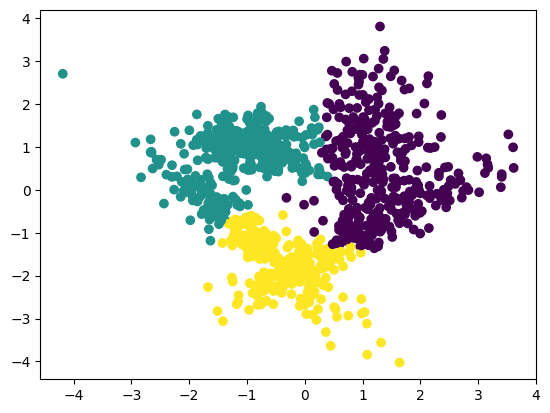

In [89]:
clustering = AgglomerativeClustering(n_clusters=best_i, linkage="ward").fit(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, df_y_2))
print("индекс жаккара:", jaccard_score(clustering.labels_, df_y_2, average= None),'\n')
print("F-мера", f1_score(df_y_2, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_2, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_2, clustering.labels_))

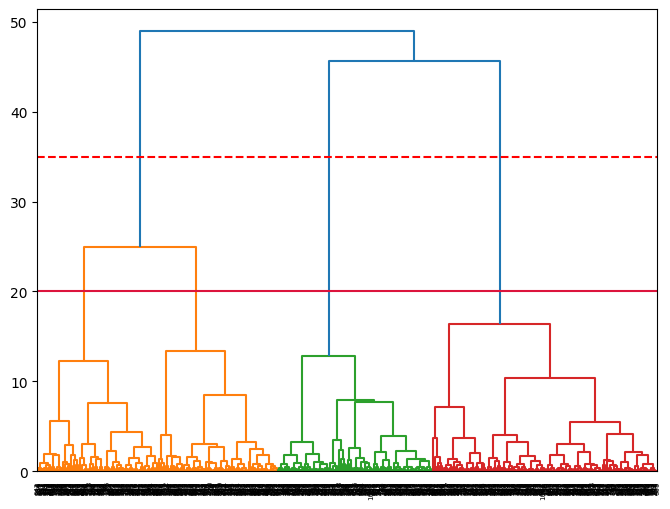

In [110]:
clusters = hierarchy.linkage(df_2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(35, color='red', linestyle='--')
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(20, color='crimson')

Датасет 2

In [94]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(df_3)
    if silhouette_score(df_3, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_3, alg.labels_)
print(best_i)

3


ранд: 0.9907647647647647
индекс жаккара: [0.         0.         0.97904192] 

F-мера 0.327
силуэт: 0.7022233752189574
индекс дэвида- болдуина: 0.4229579825973484


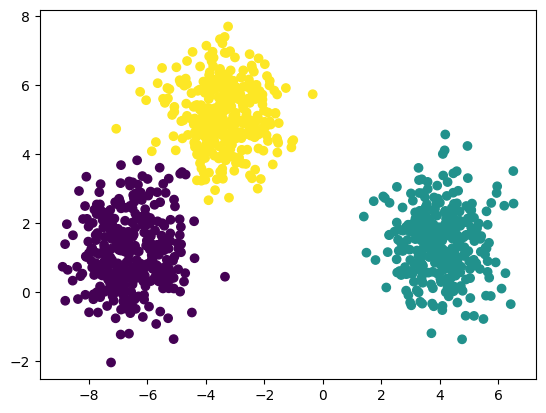

In [95]:
clustering = AgglomerativeClustering(n_clusters=best_i, linkage="ward").fit(df_3)

plt.scatter(df_3[:,0], df_3[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, df_y_3))
print("индекс жаккара:", jaccard_score(clustering.labels_, df_y_3, average= None),'\n')
print("F-мера", f1_score(df_y_3, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_3, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_3, clustering.labels_))

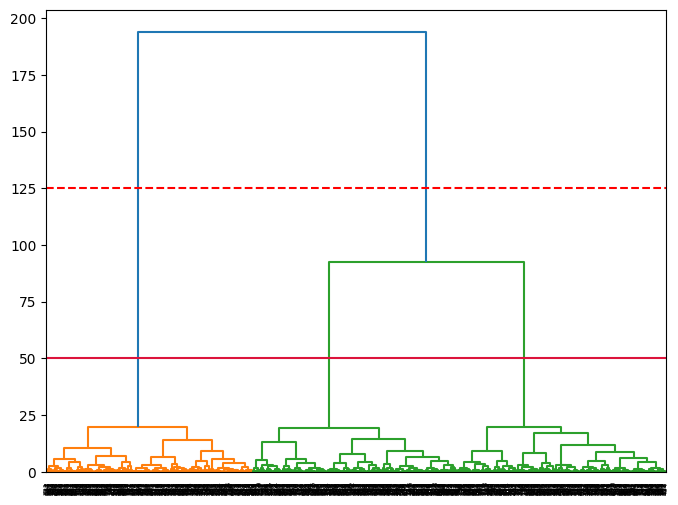

In [112]:
clusters = hierarchy.linkage(df_3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(125, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(50, color='crimson');

Датасет 3

In [97]:
best_i=0
max_rand=0
for i in range(2,30):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(df_4)
    if silhouette_score(df_4, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(df_4, alg.labels_)
print(best_i)

3


ранд: 0.8748748748748749
индекс жаккара: [0. 1. 0. 0.] 

F-мера 0.25
силуэт: 0.8271172565002517
индекс дэвида- болдуина: 0.2271243967111474


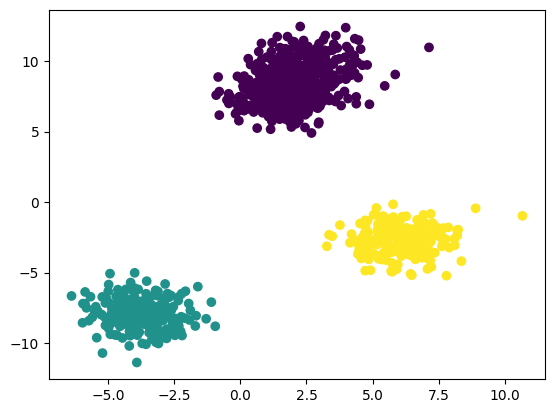

In [101]:
clustering = AgglomerativeClustering(n_clusters=best_i, linkage="ward").fit(df_4)

plt.scatter(df_4[:,0], df_4[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, df_y_4))
print("индекс жаккара:", jaccard_score(clustering.labels_, df_y_4, average= None),'\n')
print("F-мера", f1_score(df_y_4, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_4, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_4, clustering.labels_))

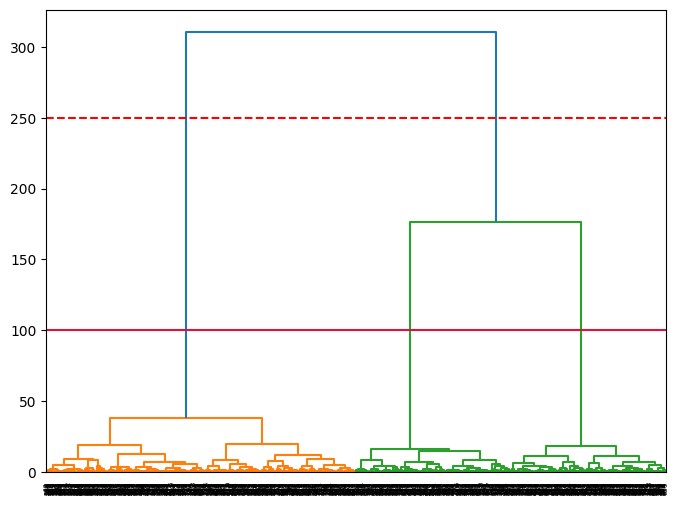

In [115]:
clusters = hierarchy.linkage(df_4, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(250, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(100, color='crimson');

### Карты Кохонена

Датасет 1

In [120]:
'''best_i=0
best_j=0
max_rand=-1
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(df_2)
        predictions = som.predict(df_2)
        if silhouette_score(df_2, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(df_2, predictions)
print(best_i, best_j)

>>> 4 1
'''

4 1


ранд: 0.6837394142783364
F-мера 0.25
силуэт: 0.4501978081966924
индекс дэвида- болдуина: 0.7952095092326962


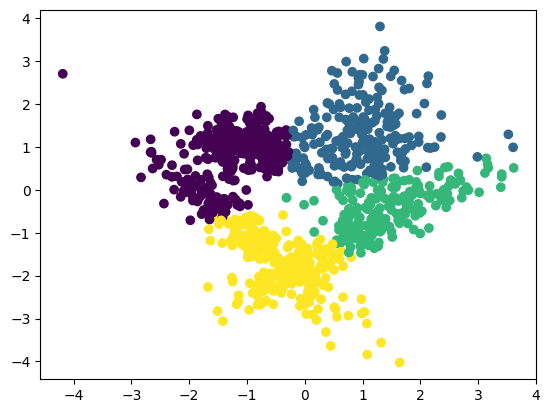

In [128]:
best_som = SOM(m=4, n=1, dim=2)
best_som.fit(df_2)

predictions = best_som.predict(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c=predictions)

print("ранд:", rand_score(predictions, df_y_2))
print("F-мера", f1_score(df_y_4, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_2, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_2, predictions))

Датасет 2

In [126]:
'''best_i=0
best_j=0
max_rand=-1
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(df_3)
        predictions = som.predict(df_3)
        if silhouette_score(df_3, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(df_3, predictions)
print(best_i, best_j)

>>> 3 1
'''

3 1


ранд: 0.9666866866866867
F-мера 0.337
силуэт: 0.6778227127987217
индекс дэвида- болдуина: 0.4452354546916099


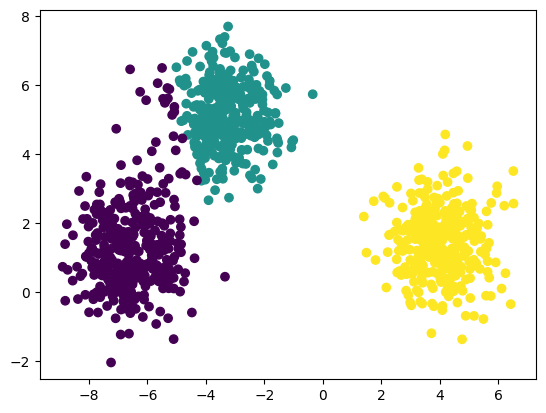

In [129]:
best_som = SOM(m=3, n=1, dim=2)
best_som.fit(df_3)

predictions = best_som.predict(df_3)

plt.scatter(df_3[:,0], df_3[:,1], c=predictions)

print("ранд:", rand_score(predictions, df_y_3))
print("F-мера", f1_score(df_y_3, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_3, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_3, predictions))

Датасет 3

In [130]:
'''
best_i=0
best_j=0
max_rand=-1
for i in range(2,10):
    for j in range (1,10):
        som = SOM(m=i, n=j, dim=2)
        som.fit(df_4)
        predictions = som.predict(df_4)
        if silhouette_score(df_4, predictions) >max_rand:
            best_i=i
            best_j=j
            max_rand=silhouette_score(df_4, predictions)
print(best_i, best_j)


>>> 2 2
'''

2 2


ранд: 0.8748748748748749
F-мера 0.25
силуэт: 0.8271172565002517
индекс дэвида- болдуина: 0.2271243967111474


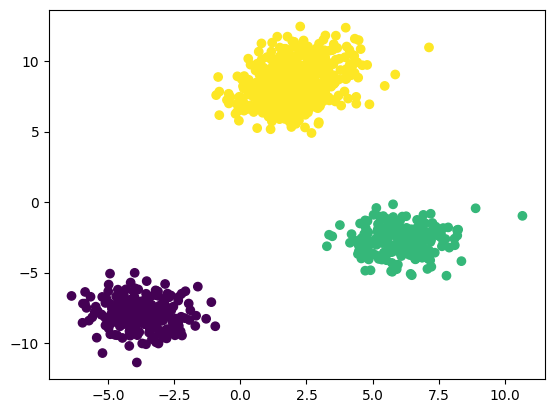

In [132]:
best_som = SOM(m=2, n=2, dim=2)
best_som.fit(df_4)

predictions = best_som.predict(df_4)

plt.scatter(df_4[:,0], df_4[:,1], c=predictions)

print("ранд:", rand_score(predictions, df_y_4))
print("F-мера", f1_score(df_y_4, clustering.labels_, average="micro"))

print("силуэт:", silhouette_score(df_4, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_4, predictions))

### Самостоятельная реализалия K-means

In [165]:
class K_Means:
    def __init__(self, n_clusters, max_iterations=300):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
    
    def _euclidean_distance(self, centroid, dots):
        return np.sqrt(np.sum((centroid[:, np.newaxis] - dots) ** 2, axis=2))

    def fit(self, data):
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            distances = self._euclidean_distance(data, self.centroids)
          
            clasters = np.argmin(distances, axis=1)
            
            new_centroids = np.array([np.mean(data[clasters == i], axis=0) for i in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids
            
    def predict(self, data):
        distances = self._euclidean_distance(data, self.centroids)
        return np.argmin(distances, axis=1)


ранд: 0.7094841286458053
F-мера 0.015968063872255488
силуэт: 0.47499739683886755
индекс дэвида- болдуина: 0.7180757954076954


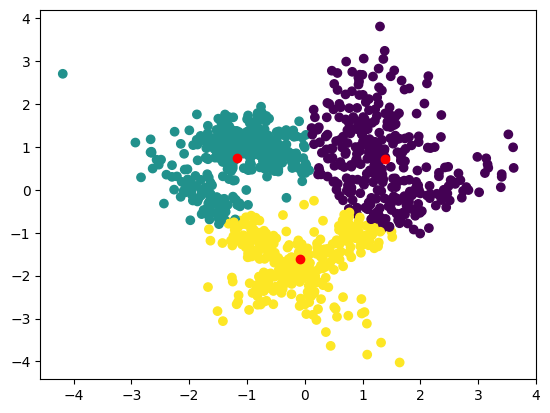

In [174]:
kmeanssob = K_Means(n_clusters=3)
kmeanssob.fit(df_2)
predictions = kmeanssob.predict(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c= predictions)
plt.scatter(kmeanssob.centroids[:, 0], kmeanssob.centroids[:, 1], c='r')

print("ранд:", rand_score(predictions, df_y_2))
print("F-мера", f1_score(predictions, df_y_2, average="micro"))

print("силуэт:", silhouette_score(df_2, predictions))
print("индекс дэвида- болдуина:", davies_bouldin_score(df_2, predictions))

Сравним с библиотечным KMeans

ранд: 0.7121401552539277
F-мера 0.015968063872255488
силуэт: 0.4750652096948164
индекс Дэвиса-Булдина: 0.7191940306255589


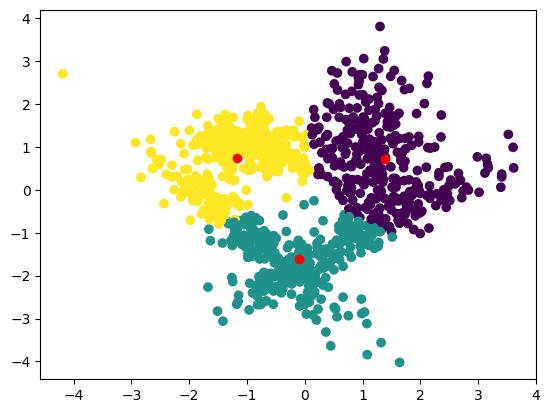

In [208]:
kmeans = KMeans(3, n_init='auto').fit(df_2)

plt.scatter(df_2[:,0], df_2[:,1], c= kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r')

print("ранд:", rand_score(df_y_2, kmeans.labels_))
print("F-мера", f1_score(predictions, df_y_2, average="micro"))

print("силуэт:", silhouette_score(df_2, kmeans.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(df_2, kmeans.labels_))

## Задание 2

In [54]:
data = pd.read_csv("../data/weatherAUS.csv")

# Удаление пропусков
data.dropna(inplace=True,ignore_index=True)
# Перевод категориал. данных в бинарные
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f).astype(int)

data['RainToday'] = data['RainToday'].replace("Yes", 1)
data['RainToday'] = data['RainToday'].replace("No", 0)
data['RainTomorrow'] = data['RainTomorrow'].replace("Yes", 1)
data['RainTomorrow'] = data['RainTomorrow'].replace("No", 0)

bn = BinaryEncoder()
data_category = bn.fit_transform(data.select_dtypes(include=['object'])).astype(int)
data_num = data.select_dtypes(exclude=['object'])
data = pd.concat([data_num, pd.DataFrame(data_category)], axis=1)
pd.set_option('display.max_columns', None)
# Балансировка данных
df_0 = data.loc[data['RainTomorrow']==0]
df_0 = df_0.sample(len(data.loc[data['RainTomorrow']==1]))
df_conc = pd.concat([data.loc[data['RainTomorrow']==1], df_0])

data_class = df_conc

In [55]:
x_class=pd.DataFrame(data_class.drop(['RainTomorrow'],axis=1))
y_class=pd.DataFrame(data_class['RainTomorrow'])


### K-means

In [187]:
'''param_grid = {
    "n_init": range(1,15),
    'algorithm': ["lloyd",'elkan'],
    "n_clusters": range(1,10)
}

gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
gridseach.fit(x_class)
gridseach.best_params_

>>> {'algorithm': 'lloyd', 'n_clusters': 9, 'n_init': 4}
'''

'param_grid = {\n    "n_init": range(1,15),\n    \'algorithm\': ["lloyd",\'elkan\'],\n    "n_clusters": range(1,10)\n}\n\ngridseach = GridSearchCV(KMeans(), param_grid=param_grid)\ngridseach.fit(x_class)\ngridseach.best_params_\n\n>>> {\'algorithm\': \'lloyd\', \'n_clusters\': 9, \'n_init\': 4}\n'

In [212]:
kmeans = KMeans(9, n_init=4,algorithm= 'lloyd').fit(x_class)

print("ранд:", rand_score(y_class.values.ravel(), kmeans.labels_))
print("F-мера", f1_score(y_class.values.ravel(), kmeans.labels_, average="micro"))

print("силуэт:", silhouette_score(x_class, kmeans.labels_))
print("индекс Дэвиса-Булдина:", davies_bouldin_score(x_class, kmeans.labels_))

ранд: 0.5341690786631056
F-мера 0.16464150639736058
силуэт: 0.16056932492127596
индекс Дэвиса-Булдина: 1.5253633185700985


### Иерархическая кластеризация


In [51]:
'''
best_i=0
max_rand=0
x=x_class[:10000]
for i in range(2,10):
    alg = AgglomerativeClustering(n_clusters=i,linkage="ward").fit(x)
    if silhouette_score(x, alg.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(x, alg.labels_)
print(best_i)

>>> 2
'''

2


In [52]:
clustering = AgglomerativeClustering(n_clusters=2,linkage="ward").fit(x_class)

print("ранд:", rand_score(clustering.labels_, y_class.values.ravel()))
print("индекс жаккара:", jaccard_score(clustering.labels_, y_class.values.ravel(), average= None),'\n')
print("F-мера", f1_score(y_class.values.ravel(), clustering.labels_, average="micro"))

print({accuracy_score(y, gradient_pred)})
print("силуэт:", silhouette_score(x_class, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, clustering.labels_))

ранд: 0.5983165984201476
индекс жаккара: [0.56544141 0.56379691] 

F-мера 0.721734932002897
силуэт: 0.20875474494838478
индекс дэвида- болдуина: 1.630105957795182


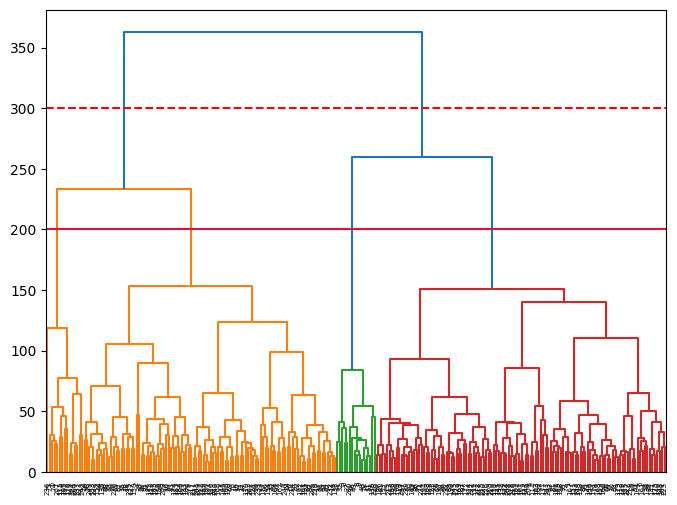

In [10]:
clusters = hierarchy.linkage(x_class, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(300, color='red', linestyle='--')
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(200, color='crimson')

### DBSCAN

In [141]:
dbscan = DBSCAN().fit(x_class.values)

In [109]:
nbrs = NearestNeighbors(n_neighbors=4).fit(x_class)
distances, indices = nbrs.kneighbors(x_class)

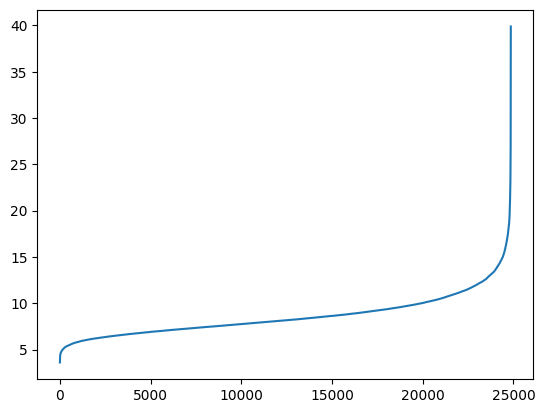

In [110]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [147]:
dbscan = DBSCAN(eps=15, min_samples=76).fit(x_class)

In [148]:
'''best_i=0
max_rand=0
dbscan=0
for i in range(1,30):
    dbloc = DBSCAN(eps=0.4, min_samples=i).fit(x_class)
    if silhouette_score(x_class, dbloc.labels_)>max_rand:
        best_i=i
        max_rand=silhouette_score(x_class, dbloc.labels_)
        dbscan1=dbloc


print(np.unique(dbscan.labels_))
plt.scatter(x_class[:,0], x_class[:,1], c=dbscan.labels_)
'''
print("ранд:", rand_score(dbscan.labels_, y_class.values.ravel()))
print("F-мера", f1_score(y_class.values.ravel(), dbscan.labels_, average="micro"))
print("силуэт:", silhouette_score(x_class.values ,dbscan.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class.values, dbscan.labels_))

ранд: 0.5262238688360822
F-мера 0.36477025830852183


силуэт: 0.1342521469493692
индекс дэвида- болдуина: 3.386121045421508


In [146]:
x_class

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_0,Location_1,Location_2,Location_3,Location_4,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
17,1,21.4,37.5,0.0,14.8,6.9,43.0,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
20,1,21.8,30.7,0.0,8.0,5.9,56.0,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
21,1,20.3,36.0,18.0,8.2,10.5,94.0,13.0,7.0,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1
32,2,23.6,40.4,0.6,11.8,12.2,54.0,9.0,11.0,42.0,17.0,1008.4,1005.0,1.0,2.0,29.9,38.7,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1
42,2,16.8,23.3,0.6,8.0,2.3,63.0,35.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10,24.5,30.0,0.0,8.4,10.7,43.0,28.0,33.0,65.0,65.0,1019.7,1016.5,2.0,2.0,28.4,27.9,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1
16976,8,6.0,16.0,2.0,2.8,9.2,59.0,26.0,39.0,61.0,37.0,1010.8,1007.9,2.0,1.0,10.6,15.2,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1
27089,9,2.9,14.6,0.2,2.4,6.2,24.0,9.0,15.0,70.0,49.0,1026.5,1024.1,7.0,7.0,9.9,13.5,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
40666,10,7.5,29.3,0.0,5.6,12.7,31.0,9.0,15.0,35.0,9.0,1019.6,1015.3,2.0,2.0,20.1,28.2,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1
